# Working with Protemoics/Protein structures in Dataframes

In [1]:
#The libraries that you need
from biopandas.pdb import PandasPdb
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## The protein structure we will work with

#### [PDB ID: 4IXP](https://www.rcsb.org/structure/4IXP)
Crystal structure of Maternal Embryonic Leucine Zipper Kinase (MELK) <br>
DOI: 10.2210/pdb4IXP/pdb <br>
Classification: TRANSFERASE <br>
Organism(s): Homo sapiens <br>
Expression System: Escherichia coli BL21(DE3) <br>
Mutation(s): 2 <br>
Deposited: 2013-01-27 Released: 2013-09-11 <br>
Deposition Author(s): Cao, L.S., Wang, J., Wang, Z.X., Wu, J.W.

In [2]:
import nglview as nv
view = nv.show_pdbid('4IXP')
view

NGLWidget()

In [3]:
ppdb = PandasPdb().fetch_pdb('4IXP')
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,2,,...,-47.752,74.937,35.839,1.0,116.74,,,N,NaN,370
1,ATOM,2,,CA,,LYS,,A,2,,...,-47.056,73.702,35.510,1.0,118.80,,,C,NaN,372
2,ATOM,3,,C,,LYS,,A,2,,...,-48.055,72.663,35.017,1.0,118.80,,,C,NaN,374
3,ATOM,4,,O,,LYS,,A,2,,...,-49.108,72.455,35.623,1.0,117.49,,,O,NaN,376
4,ATOM,5,,CB,,LYS,,A,2,,...,-46.276,73.186,36.722,1.0,119.16,,,C,NaN,378


In [6]:
ppdb.df['ATOM'].dtypes

record_name        object
atom_number         int64
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int64
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

### Find the meta data

In [99]:
ppdb.df['OTHERS'].head(10)

,record_name,entry,line_idx
0,HEADER,TRANSFERASE 27...,0
1,TITLE,CRYSTAL STRUCTURE OF MATERNAL EMBRYONIC LE...,1
2,COMPND,MOL_ID: 1;,2
3,COMPND,2 MOLECULE: MATERNAL EMBRYONIC LEUCINE ZIPP...,3
4,COMPND,3 CHAIN: A;,4
5,COMPND,4 FRAGMENT: N-TERMINAL;,5
6,COMPND,"5 SYNONYM: HMELK, PROTEIN KINASE EG3, PEG3 ...",6
7,COMPND,"6 HPK38, TYROSINE-PROTEIN KINASE MELK;",7
8,COMPND,"7 EC: 2.7.11.1, 2.7.10.2;",8
9,COMPND,8 ENGINEERED: YES;,9


####  get all Proline residues

In [111]:
ppdb.df['ATOM'][ppdb.df['ATOM']['residue_name'] == 'THR'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
131,ATOM,132,,N,,THR,,A,16,,...,-36.070,58.387,32.327,1.0,87.39,,,N,NaN,632
132,ATOM,133,,CA,,THR,,A,16,,...,-36.696,58.345,31.016,1.0,87.75,,,C,NaN,634
133,ATOM,134,,C,,THR,,A,16,,...,-36.205,57.136,30.191,1.0,90.95,,,C,NaN,636
134,ATOM,135,,O,,THR,,A,16,,...,-35.047,56.727,30.310,1.0,83.33,,,O,NaN,638
135,ATOM,136,,CB,,THR,,A,16,,...,-36.572,59.705,30.284,1.0,81.56,,,C,NaN,640


## B factor

#### compute the average temperature factor of our protein main chain

In [6]:
mainchain = ppdb.df['ATOM'][(ppdb.df['ATOM']['atom_name'] == 'C') | 
                            (ppdb.df['ATOM']['atom_name'] == 'O') | 
                            (ppdb.df['ATOM']['atom_name'] == 'N') | 
                            (ppdb.df['ATOM']['atom_name'] == 'CA')]

bfact_mc_avg = mainchain['b_factor'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 72.40


In [7]:
from matplotlib import style
style.use('ggplot')

In [73]:
df1 = ppdb.df['ATOM']
df1.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,2,,...,-47.752,74.937,35.839,1.0,116.74,,,N,NaN,370
1,ATOM,2,,CA,,LYS,,A,2,,...,-47.056,73.702,35.510,1.0,118.80,,,C,NaN,372
2,ATOM,3,,C,,LYS,,A,2,,...,-48.055,72.663,35.017,1.0,118.80,,,C,NaN,374
3,ATOM,4,,O,,LYS,,A,2,,...,-49.108,72.455,35.623,1.0,117.49,,,O,NaN,376
4,ATOM,5,,CB,,LYS,,A,2,,...,-46.276,73.186,36.722,1.0,119.16,,,C,NaN,378


Text(0, 0.5, 'count')

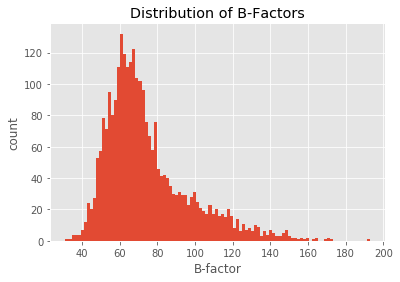

In [77]:
df1['b_factor'].plot(kind='hist', bins = 100)
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')

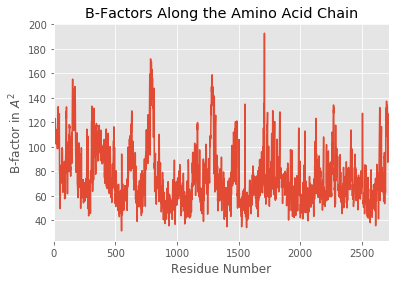

In [100]:
ppdb.df['ATOM']['b_factor'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

## Create a interactive plot

In [20]:
import plotly 
plotly.tools.set_credentials_file(username='lusha', api_key='sTuGc49l2WBfGKFqISLo')

In [105]:
import plotly.plotly as py
import plotly.graph_objs as go

In [75]:
data = [go.Histogram(x = df1['b_factor'])]

In [76]:
py.iplot(data, filename='simple-histogram')

## More about B factor

In [106]:
#df1[(df1['residue_name'] == 'ASP') | (df1['residue_name'] == 'ARG')]

In [112]:
#fetch another MELK structure
pdb2 = PandasPdb().fetch_pdb('4D2P')
pdb2.df['ATOM'].head(10)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,MET,,A,1,,...,15.541,-2.073,-29.055,1.0,96.55,,,N,NaN,1078
1,ATOM,2,,CA,,MET,,A,1,,...,15.250,-0.753,-28.499,1.0,95.56,,,C,NaN,1080
2,ATOM,3,,C,,MET,,A,1,,...,16.188,-0.415,-27.345,1.0,97.29,,,C,NaN,1082
3,ATOM,4,,O,,MET,,A,1,,...,16.205,-1.118,-26.334,1.0,95.92,,,O,NaN,1084
4,ATOM,5,,CB,,MET,,A,1,,...,13.783,-0.645,-28.057,1.0,96.71,,,C,NaN,1086
5,ATOM,6,,CG,,MET,,A,1,,...,12.875,-0.081,-29.121,1.0,102.72,,,C,NaN,1088
6,ATOM,7,,SD,,MET,,A,1,,...,11.762,-1.294,-29.890,1.0,108.53,,,S,NaN,1090
7,ATOM,8,,CE,,MET,,A,1,,...,12.847,-2.034,-31.091,1.0,107.48,,,C,NaN,1092
8,ATOM,9,,N,,LYS,,A,2,,...,16.963,0.672,-27.512,1.0,93.78,,,N,NaN,1094
9,ATOM,10,,CA,,LYS,,A,2,,...,17.993,1.192,-26.603,1.0,92.78,,,C,NaN,1096


In [63]:
#4 chains
pdb2.df['ATOM']['chain_id'].value_counts()

B    2611
D    2567
C    2565
A    2550
Name: chain_id, dtype: int64

In [64]:
df2 = pdb2.df['ATOM']

In [66]:
df2 = df2.loc[df2['chain_id'] == 'A', :]

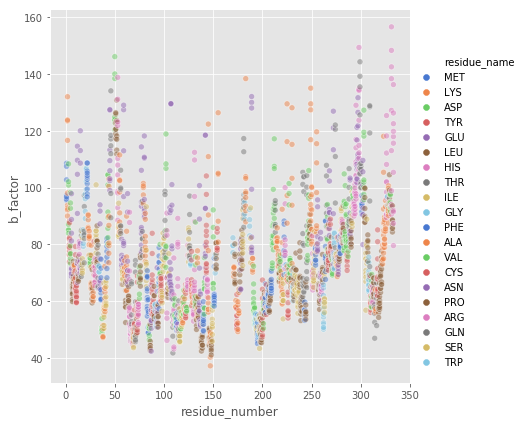

In [108]:
sns.relplot(x="residue_number", y="b_factor", hue="residue_name", alpha=.5, palette="muted",
            height=6, data=df2)

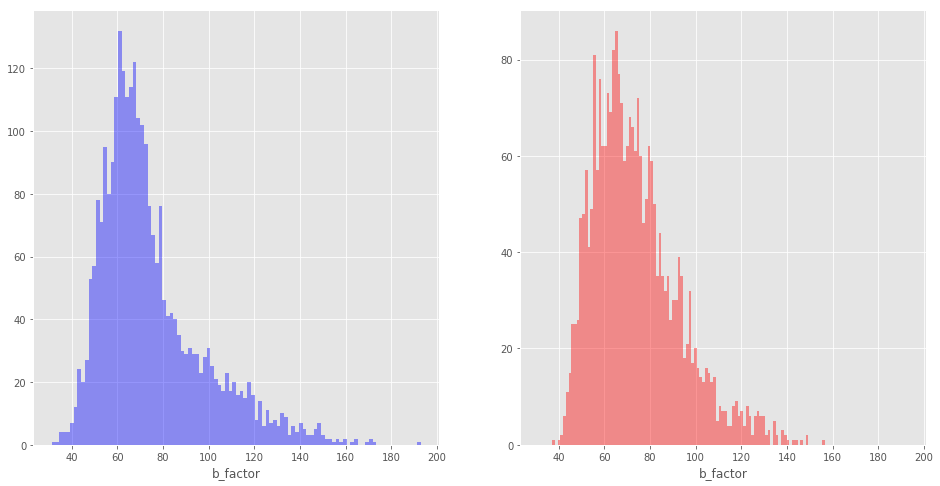

In [87]:
# the two structure B-factor comparison
f, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)
sns.distplot(df1['b_factor'], kde = False, bins = 100, color="b", ax=axes[0])
sns.distplot(df2['b_factor'], kde = False, bins = 100, color="r", ax=axes[1])

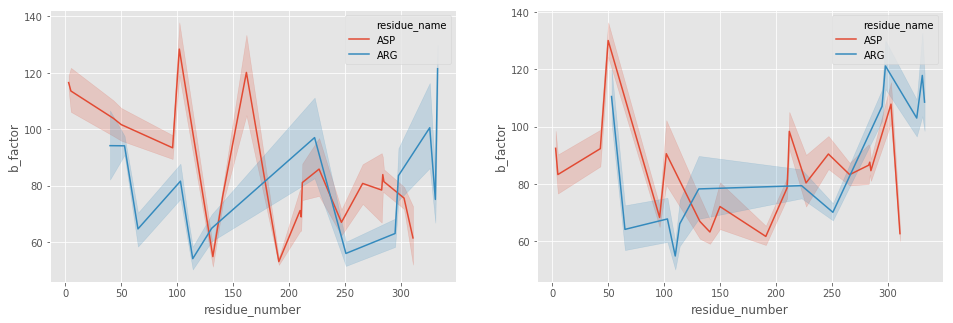

In [104]:
f, axes = plt.subplots(1, 2, figsize = (16, 5), sharex=True)
sns.lineplot(x="residue_number", y="b_factor", hue="residue_name", 
             data=df1[(df1['residue_name'] == 'ASP') | (df1['residue_name'] == 'ARG')], ax = axes[0])
sns.lineplot(x="residue_number", y="b_factor", hue="residue_name", 
             data=df2[(df2['residue_name'] == 'ASP') | (df2['residue_name'] == 'ARG')], ax = axes[1])

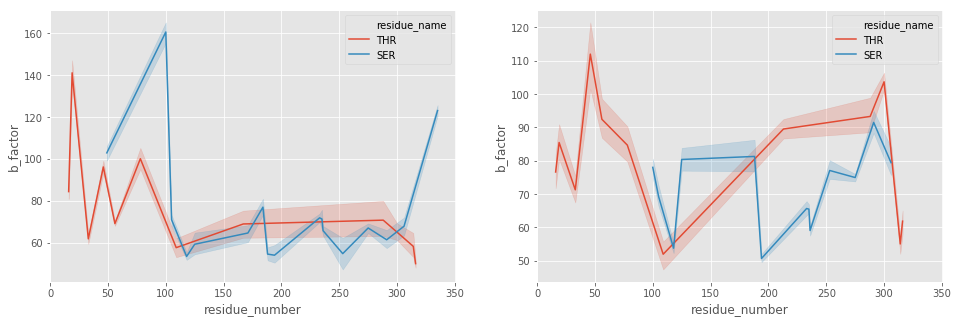

In [110]:
f, axes = plt.subplots(1, 2, figsize = (16, 5), sharex=True)
sns.lineplot(x="residue_number", y="b_factor", hue="residue_name", 
             data=df1[(df1['residue_name'] == 'THR') | (df1['residue_name'] == 'SER')], ax = axes[0])
sns.lineplot(x="residue_number", y="b_factor", hue="residue_name", 
             data=df2[(df2['residue_name'] == 'THR') | (df2['residue_name'] == 'SER')], ax = axes[1])

#### Reference
1. Sebastian Raschka. Biopandas: Working with molecular structures in pandas dataframes. The Journal of Open Source Software, 2(14), jun 2017. doi: 10.21105/joss.00279. URL http://dx.doi.org/10.21105/joss.00279.
2. Hai Nguyen, David A Case, Alexander S Rose; NGLview - Interactive molecular graphics for Jupyter notebooks, Bioinformatics, , btx789, https://doi.org/10.1093/bioinformatics/btx789
3. Structural basis for the regulation of maternal embryonic leucine zipper kinase. Cao, L.S., Wang, J., Chen, Y., Deng, H., Wang, Z.X., Wu, J.W.(2013) Plos One 8: e70031-e70031. DOI: 10.1371/journal.pone.0070031